In [63]:
# Imports - exercise 7
from skimage import color, io, measure, img_as_ubyte
from skimage.measure import profile_line
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import numpy as np
from skimage.util import img_as_ubyte
from skimage.util import img_as_float
import time
import cv2
from scipy.ndimage import correlate
from skimage.filters import median
from skimage.filters import prewitt_h
from skimage.filters import prewitt_v
from skimage.filters import prewitt
from skimage.filters import gaussian
from skimage import data
from skimage import filters
from skimage.color import rgb2gray
from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import disk 
from skimage import color
from skimage.util import img_as_ubyte
from skimage.util import img_as_float
from skimage.filters import prewitt
from skimage.filters import threshold_otsu
from skimage.filters import median
from skimage.filters import gaussian
from skimage import io, color, morphology
from skimage.util import img_as_float, img_as_ubyte
import matplotlib.pyplot as plt
import numpy as np
import math
from skimage.filters import threshold_otsu
from skimage import segmentation
from skimage import measure
from skimage.color import label2rgb

import matplotlib.pyplot as plt
import math
from skimage.transform import rotate
from skimage.transform import EuclideanTransform
from skimage.transform import SimilarityTransform
from skimage.transform import warp
from skimage.transform import swirl
from skimage.transform import matrix_transform


In [1]:
def plot_comparison(original, filtered, filter_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')
    io.show()

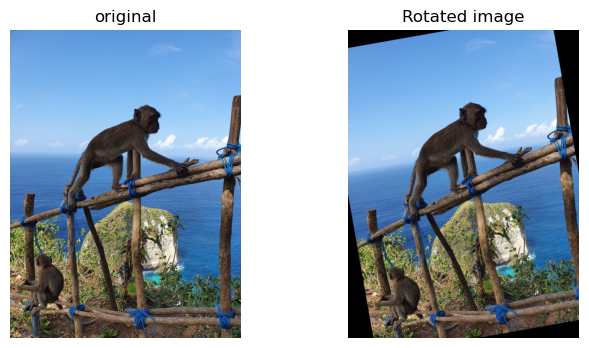

In [6]:
in_dir = "./data/"
im_org = io.imread(in_dir + "NusaPenida.png")

# angle in degrees - counter clockwise
rotation_angle = 10
rotated_img = rotate(im_org, rotation_angle)
plot_comparison(im_org, rotated_img, "Rotated image")

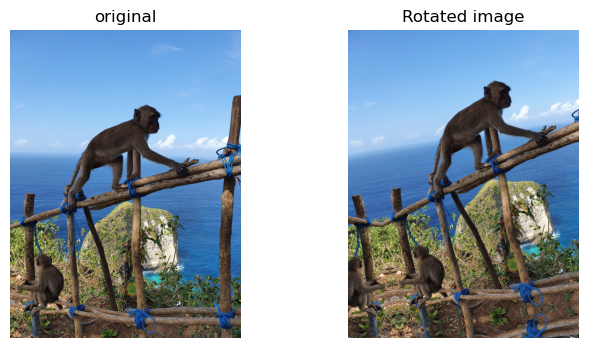

In [10]:
# Exercise 2
rot_center = [10, 10]
rotated_img = rotate(im_org, rotation_angle, center=rot_center, mode="reflect")
plot_comparison(im_org, rotated_img, "Rotated image")

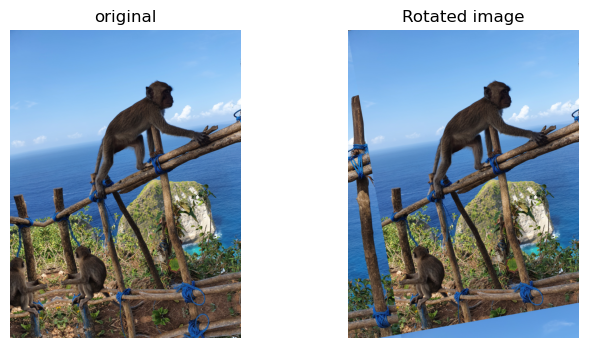

In [13]:
# Exercise 3
rot_center = [10, 10]
rotated_img = rotate(im_org, rotation_angle, center=rot_center, mode="reflect")
rotated_img2 = rotate(im_org, rotation_angle, center=rot_center, mode="wrap")
plot_comparison(rotated_img, rotated_img2, "Rotated image")

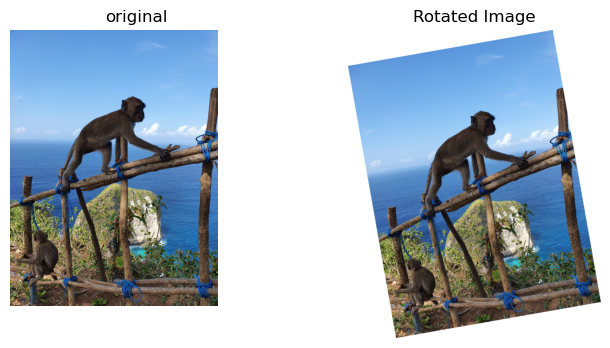

In [19]:
# Exercise 4
rotated_img = rotate(im_org, rotation_angle, resize=True, mode="constant", cval=1)
plot_comparison(im_org, rotated_img, "Rotated Image")

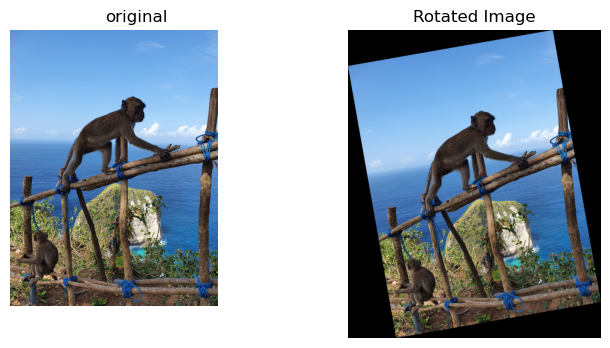

In [22]:
# Exercise 5
rotated_img = rotate(im_org, rotation_angle, resize=True)
plot_comparison(im_org, rotated_img, "Rotated Image")

In [24]:
# Exercise 6

# angle in radians - counter clockwise
rotation_angle = 10.0 * math.pi / 180.
trans = [10, 20]
tform = EuclideanTransform(rotation=rotation_angle, translation=trans)
print(tform.params)

[[ 0.98480775 -0.17364818 10.        ]
 [ 0.17364818  0.98480775 20.        ]
 [ 0.          0.          1.        ]]


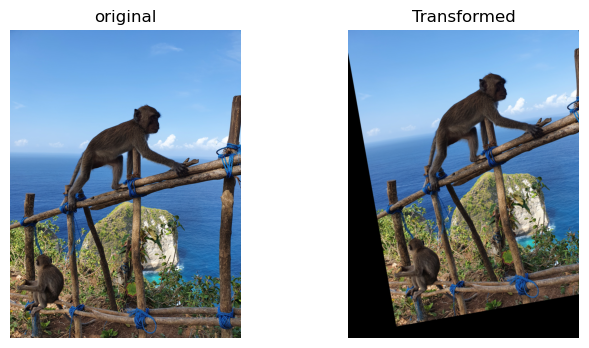

In [26]:
# Exercise 7
transformed_img = warp(im_org, tform)
plot_comparison(im_org, transformed_img, "Transformed")

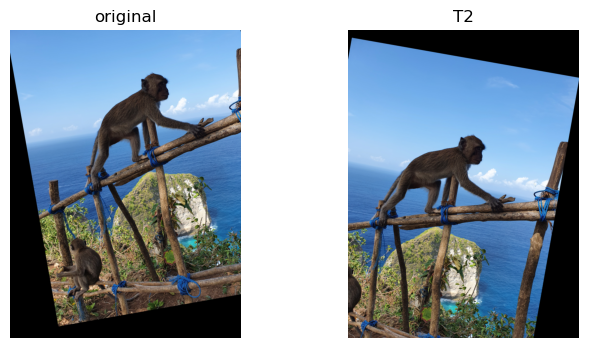

In [28]:
# Exercise 8
transformed_img2 = warp(im_org, tform.inverse)
plot_comparison(transformed_img, transformed_img2, "T2")

[[ 0.98480775 -0.17364818  0.        ]
 [ 0.17364818  0.98480775  0.        ]
 [ 0.          0.          1.        ]]


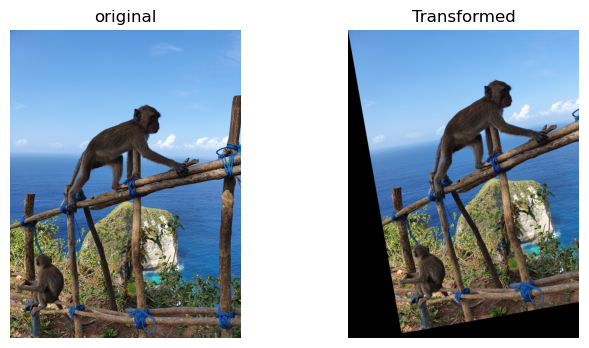

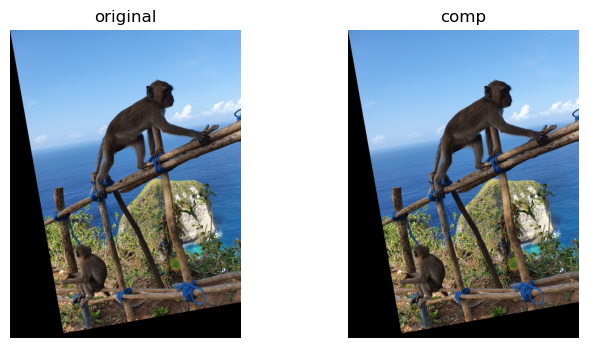

In [36]:
# Exercise 8
# angle in radians - counter clockwise
rotation_angle = 10.0 * math.pi / 180.
# trans = [10, 20]
tform = EuclideanTransform(rotation=rotation_angle)
print(tform.params)

transformed_img = warp(im_org, tform)

plot_comparison(im_org, transformed_img, "Transformed")

rot_center = [0, 0]
rotated_img = rotate(im_org, 10, center=rot_center)

plot_comparison(transformed_img, rotated_img, "comp")

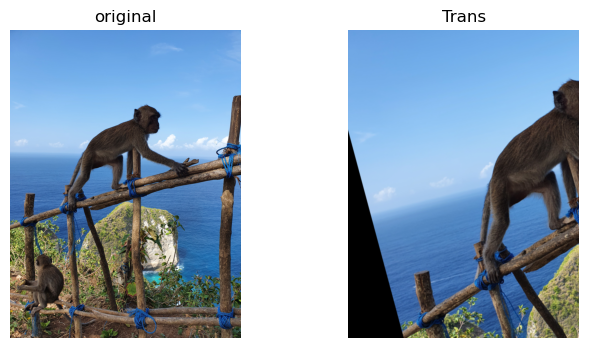

In [40]:
# Exercise 9
# angle in radians - counter clockwise
rotation_angle = 15.0 * math.pi / 180.
trans = [40, 30]
tform = SimilarityTransform(rotation=rotation_angle, translation=trans, scale=0.6)

transformed_img = warp(im_org, tform)

plot_comparison(im_org, transformed_img, "Trans")

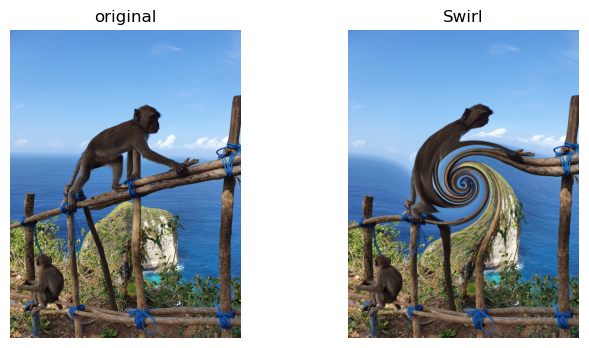

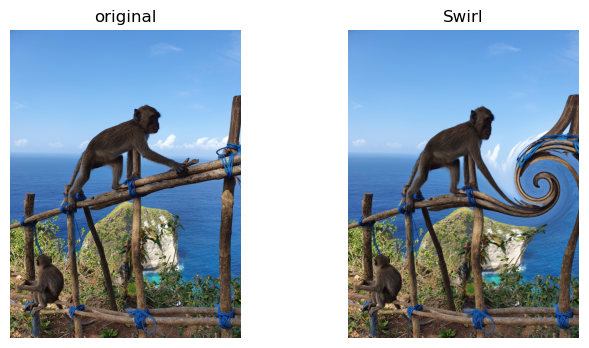

In [42]:
# Exercise 10
str = 10
rad = 300
swirl_img = swirl(im_org, strength=str, radius=rad)

plot_comparison(im_org, swirl_img, "Swirl")

str = 10
rad = 300
c = [500, 400]
swirl_img = swirl(im_org, strength=str, radius=rad, center=c)

plot_comparison(im_org, swirl_img, "Swirl")

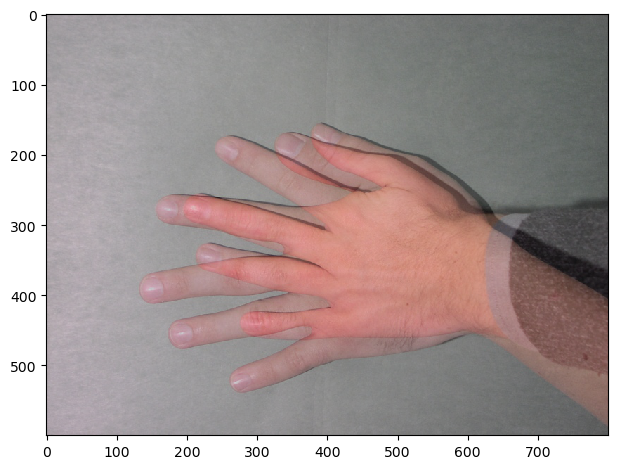

In [47]:
# Exercise 11

src_img = io.imread(in_dir + "Hand1.jpg")
dst_img = io.imread(in_dir + "Hand2.jpg")


blend = 0.5 * img_as_float(src_img) + 0.5 * img_as_float(dst_img)
io.imshow(blend)
io.show()

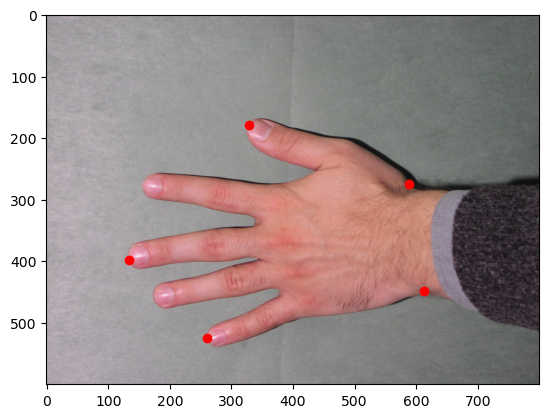

In [49]:
# Exercise 12
src = np.array([[588, 274], [328, 179], [134, 398], [260, 525], [613, 448]])

plt.imshow(src_img)
plt.plot(src[:, 0], src[:, 1], '.r', markersize=12)
plt.show()

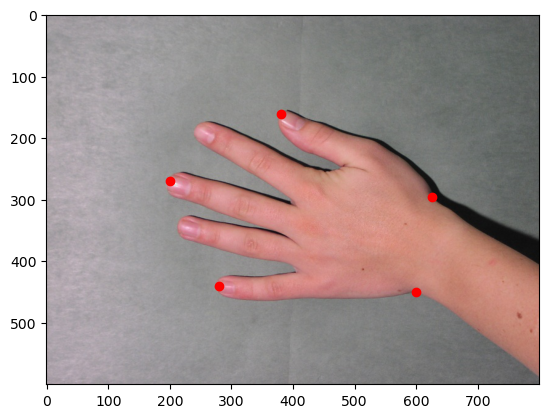

In [53]:
# Exercise 13
dst = np.array([[625, 296], [380, 160], [200, 270],  [280, 440], [600, 450]])

plt.imshow(dst_img)
plt.plot(dst[:, 0], dst[:, 1], '.r', markersize=12)
plt.show()

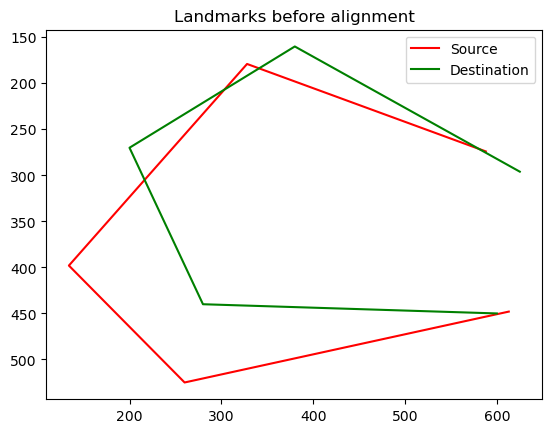

In [55]:
fig, ax = plt.subplots()
ax.plot(src[:, 0], src[:, 1], '-r', markersize=12, label="Source")
ax.plot(dst[:, 0], dst[:, 1], '-g', markersize=12, label="Destination")
ax.invert_yaxis()
ax.legend()
ax.set_title("Landmarks before alignment")
plt.show()

In [58]:
# result_arr = [math.pow(a1 - a2, 2) for ]
# Exercise 14
e_x = src[:, 0] - dst[:, 0]
error_x = np.dot(e_x, e_x)
e_y = src[:, 1] - dst[:, 1]
error_y = np.dot(e_y, e_y)
f = error_x + error_y
print(f"Landmark alignment error F: {f}")

Landmark alignment error F: 33456


Landmark alignment error F: 4698.82394260018


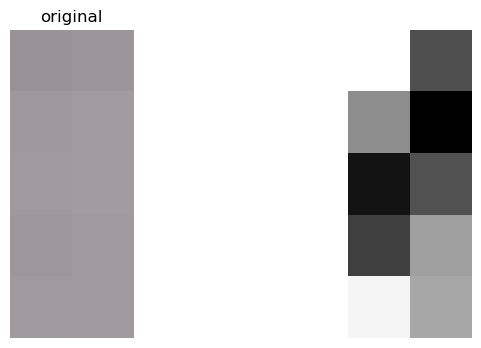

In [71]:
tform = EuclideanTransform()
tform.estimate(src, dst)
src_transform = matrix_transform(src, tform.params)

e_x = src_transform[:, 0] - dst[:, 0]
error_x = np.dot(e_x, e_x)
e_y = src_transform[:, 1] - dst[:, 1]
error_y = np.dot(e_y, e_y)
f = error_x + error_y
print(f"Landmark alignment error F: {f}")


plot_comparison(src_img, src_transform, "")


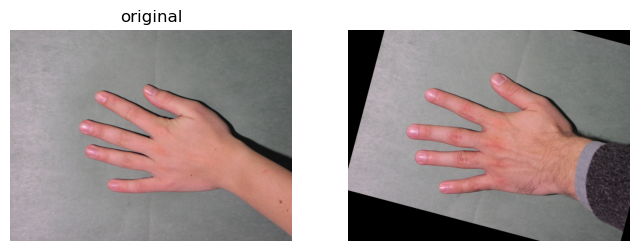

In [75]:
# Exercise 16
warped = warp(src_img, tform.inverse)
plot_comparison(dst_img, warped, "")
